In [1]:
import math
from unittest import result
import pandas as pd
from re import M
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

data = pd.read_csv("Iris.csv")
data = data.drop(['Id'], axis=1)
data = data.drop(['Species'], axis=1)
data = data.drop(['SepalLengthCm'], axis=1)
data = data.drop(['SepalWidthCm'], axis=1)

#req data in dataframe format
setosa = data[0:50]
virginica = data[50:100]
versicolor = data[100:150]

#covvariance matrix in dataframe format
setcov = setosa.cov()
vircov = virginica.cov()
versicov = versicolor.cov()

#covvariance in numpy format
sc = setcov.to_numpy()
vc = vircov.to_numpy()
vec = versicov.to_numpy()

#inv-covvariance in numpy format
invcovsc = np.linalg.inv(sc)
invcovvc = np.linalg.inv(vc)
invcovvec = np.linalg.inv(vec)

#req data in numpy format
setosa = setosa.to_numpy()
virginica = virginica.to_numpy()
versicolor = versicolor.to_numpy()

x = Symbol('x') # four dimensional feature vector
y = Symbol('y')

In [2]:
def equation(X, MU, invcov, cov, Pw):
    diff = list(np.subtract(X, MU))
    diffT = list(np.transpose(diff))

    d1=np.dot(diffT,invcov)
    d2=np.dot(d1,diff)

    val = -0.5*log((abs(np.linalg.det(cov)))) + ((-1/2)*d2) + log(Pw)
    return val 


def meanval(data):
    s1 = 0.0
    for i in range(len(data)):
        s1 = s1 + data[i][0]
    MU1 = s1/50

    s1 = 0.0
    for i in range(len(data)):
        s1 = s1 + data[i][1]
    MU2 = s1/50

    MU = list((MU1, MU2))

    return MU


In [3]:
Pw1 = 0.33
Pw2 = 0.33
Pw3 = 0.33

MU = meanval(setosa)
X = list((x, y))

g1x = equation(X, MU, invcovsc, sc, Pw1)

MU = meanval(virginica)
X = list((x, y))

g2x = equation(X, MU, invcovvc, vc, Pw2)

MU = meanval(versicolor)
X = list((x, y))

g3x = equation(X, MU, invcovvec, vec, Pw3)

gx1=solve(g1x-g2x,y,dict=True)
gx2=solve(g2x-g3x,y,dict=True)
gx3=solve(g3x-g1x,y,dict=True)

print(gx1)
print(gx2)
print(gx3)

[{y: -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464}, {y: -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464}]
[{y: 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689}, {y: 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689}]
[{y: 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173}, {y: 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173}]


<lambdifygenerated-253>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-254>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-255>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-256>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-257>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464


<lambdifygenerated-366>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-367>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-368>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-369>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-370>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464


<lambdifygenerated-476>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-477>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-478>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-479>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-480>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464


<lambdifygenerated-570>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-571>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-572>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-573>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-574>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464


<lambdifygenerated-715>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-716>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-717>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-718>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-719>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464


<lambdifygenerated-798>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-799>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-800>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-801>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-802>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464


<lambdifygenerated-967>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-968>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-969>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-970>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-971>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464


<lambdifygenerated-1343>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1344>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1345>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1346>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1347>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.085708365772

<lambdifygenerated-1508>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1509>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1510>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1511>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1512>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.085708365772

<lambdifygenerated-1710>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1711>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1712>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1713>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1714>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.085708365772

<lambdifygenerated-1967>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1968>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1969>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1970>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464
<lambdifygenerated-1971>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.085708365772

<lambdifygenerated-2661>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2662>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2663>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2664>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2665>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) 

<lambdifygenerated-2784>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2785>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2786>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2787>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2788>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) 

<lambdifygenerated-2888>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2889>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2890>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2891>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2892>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) 

<lambdifygenerated-2983>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2984>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2985>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2986>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-2987>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) 

<lambdifygenerated-3625>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3626>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3627>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3628>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3629>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) 

<lambdifygenerated-3731>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3732>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3733>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3734>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3735>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) 

<lambdifygenerated-3863>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3864>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3865>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3866>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3867>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) 

<lambdifygenerated-3986>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3987>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3988>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3989>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689
<lambdifygenerated-3990>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) 

<lambdifygenerated-4362>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4363>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4364>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4365>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4366>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


<lambdifygenerated-4474>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4475>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4476>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4477>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4478>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


<lambdifygenerated-4589>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4590>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4591>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4592>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4593>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


<lambdifygenerated-4748>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4749>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4750>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4751>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4752>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


<lambdifygenerated-4871>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4872>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4873>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4874>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-4875>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


<lambdifygenerated-5272>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5273>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5274>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5275>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5276>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


<lambdifygenerated-5417>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5418>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5419>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5420>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5421>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


<lambdifygenerated-5558>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5559>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5560>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5561>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5562>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


<lambdifygenerated-5644>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5645>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5646>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5647>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5648>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


<lambdifygenerated-5729>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5730>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5731>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5732>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5733>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


<lambdifygenerated-5807>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5808>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5809>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5810>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5811>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


<lambdifygenerated-5940>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5941>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5942>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5943>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173
<lambdifygenerated-5944>:2: RuntimeWarning: invalid value encountered in sqrt
  return 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173


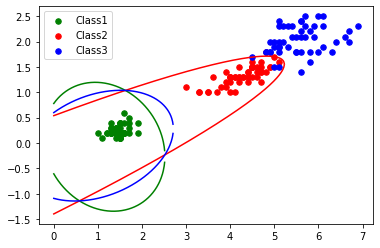

[{y: -0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464}, {y: -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198122*x**2 + x + 0.25123453060943) + 0.0857083657727464}]
[{y: 0.379348898379014*x - 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689}, {y: 0.379348898379014*x + 0.969021830332693*sqrt(-0.0140965221198484*x**2 - 0.117692978621298*x + 1) - 0.429432728163689}]
[{y: 0.194537614676534*x - 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173}, {y: 0.194537614676534*x + 0.856743491745518*sqrt(-0.501846727754524*x**2 + x + 0.974471851098733) - 0.24599650713173}]


In [4]:
# print("The Decision Boundary is : y =",gx1[0][y],'\n')
xx=np.linspace(0, 10, 1000)
yy=[lambdify(x,gx1[0][y])(val) for val in xx]
plt.plot(xx,yy,color='green')

xx=np.linspace(0, 10, 1000)
yy=[lambdify(x,gx1[1][y])(val) for val in xx]
plt.plot(xx,yy,color='green')

xx=np.linspace(0, 10, 1000)
yy=[lambdify(x,gx2[0][y])(val) for val in xx]
plt.plot(xx,yy,color='red')

xx=np.linspace(0, 10, 1000)
yy=[lambdify(x,gx2[1][y])(val) for val in xx]
plt.plot(xx,yy,color='red')

xx=np.linspace(0, 10, 1000)
yy=[lambdify(x,gx3[0][y])(val) for val in xx]
plt.plot(xx,yy,color='blue')

xx=np.linspace(0, 10, 1000)
yy=[lambdify(x,gx3[1][y])(val) for val in xx]
plt.plot(xx,yy,color='blue')

plt.scatter(setosa[:,0],setosa[:,1],label="Class1",color="green", s = 30)
plt.scatter(virginica[:,0],virginica[:,1],label="Class2",color="red", s = 30)
plt.scatter(versicolor[:,0],versicolor[:,1],label="Class3",color="blue", s = 30) 

plt.legend()
plt.show()

print(gx1)
print(gx2)
print(gx3)

